# Player C Report

## Section 1: Performing Correlation on all Biomechanical Markers Irrelevant of Pitch Type Using *.corr()*

### Findings Summary (Average)
1. Weak correlation between *knee_flexion_extension_drive_leg_at_footstrike* and *fatigue_score* with a **threshold = 0.34**

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import csv files as dataframes 
fatigue = pd.read_csv('fatigue_index.csv', index_col=False)
pitching = pd.read_csv('pitching_mechanics.csv', index_col=False)

In [3]:
# drop rows with values = NaN
fatigue.dropna(inplace=True)
pitching.dropna(inplace=True)

In [4]:
fatigue.head()

,player_id,report_date,game_date,score,last_outing_pitches,pitch_last_4_days,consec,cumulative_inning_pitched
0,pitcher A,2022-04-09,2022-04-01 00:00:00.000000 UTC,0.000000,33.0,0.0,0,0.0
1,pitcher A,2022-04-10,2022-04-01 00:00:00.000000 UTC,0.000000,33.0,0.0,0,0.0
2,pitcher A,2022-04-11,2022-04-10 00:00:00.000000 UTC,12.157287,16.0,16.0,1,2.0
3,pitcher A,2022-04-12,2022-04-10 00:00:00.000000 UTC,5.269455,16.0,16.0,1,2.0
4,pitcher A,2022-04-13,2022-04-12 00:00:00.000000 UTC,17.126998,21.0,37.0,2,3.0


In [5]:
# convert to datetime and format as 'YYYY-MM-DD'
# necessary to join data later
fatigue['game_date'] = pd.to_datetime(fatigue['game_date'].str.replace(" UTC", "", regex=False)).dt.strftime('%Y-%m-%d')

In [8]:
# filter to create two new dataframes for specifically for player B
player_c_fatigue = fatigue[fatigue['player_id'] == 'pitcher C']
player_c_pitching = pitching[pitching['player_id'] == 'pitcher C']

In [9]:
player_c_fatigue.head()

,player_id,report_date,game_date,score,last_outing_pitches,pitch_last_4_days,consec,cumulative_inning_pitched
344,pitcher C,2022-04-09,2022-04-08,26.318428,22.0,37.0,2,1.000000
345,pitcher C,2022-04-10,2022-04-09,29.517519,16.0,38.0,2,2.333333
346,pitcher C,2022-04-11,2022-04-09,17.454451,16.0,38.0,2,2.333333
347,pitcher C,2022-04-12,2022-04-11,34.714255,11.0,49.0,3,3.333333
348,pitcher C,2022-04-13,2022-04-11,13.193727,11.0,27.0,2,3.333333


In [10]:
player_c_pitching.head()

,player_id,game_date,pitcher_throws,pitch_release_velocity,pitch_spin_rate,inning,pitch_type,hip_shoulder_separation_at_footstrike,pitching_shoulder_abduction_at_footstrike,pitching_shoulder_horizontal_abduction_at_footstrike,...,hip_internal_rotation_external_rotation_lead_leg_at_release,knee_flexion_extension_drive_leg_at_release,knee_flexion_extension_lead_leg_at_release,trunk_forward_bend_at_release,trunk_side_bend_at_release,trunk_rotation_at_release,pelvis_rotation_at_release,arm_slot_degree_at_release,max_pitching_shoulder_external_rotation,max_hip_shoulder_separation
1597,pitcher C,2022-04-08,right,86.108037,2652.813005,9,slider,-36.157417,86.636929,11.940322,...,32.302731,60.160427,33.595047,28.229080,45.778055,123.941220,70.497854,75.0,-190.195451,-53.649140
1598,pitcher C,2022-04-08,right,86.557510,2690.140764,9,slider,-45.096664,89.107260,7.430836,...,20.099816,67.969359,33.076840,31.557133,43.683336,121.653672,73.790596,75.0,-185.015724,-51.624932
1599,pitcher C,2022-04-08,right,98.042739,2598.539439,9,cutter,-40.234866,93.181635,7.182349,...,31.687368,65.434313,32.495592,27.624456,43.791601,125.126750,69.316759,80.0,-188.973890,-51.206272
1602,pitcher C,2022-04-08,right,87.730756,2595.044174,9,slider,-41.469150,87.371261,11.036360,...,13.985618,60.966536,41.317329,31.175589,44.521474,123.391090,71.475727,75.0,-188.800143,-49.613168
1603,pitcher C,2022-04-08,right,85.476065,2603.785682,9,slider,-33.902181,87.249028,9.240030,...,18.729643,59.031091,41.325851,25.721742,46.849386,121.985935,63.682588,76.0,-188.643892,-52.730290


In [ ]:
# grab the date of the games player C pitched in
pitching_game_dates = player_c_pitching['game_date'].unique().tolist()

In [12]:
# return correlated markers based on given threshold
def get_correlated_markers(df, threshold):
    # create an empty dictionary to store the correlated markers
    correlated_markers = {}
    # iterate through the columns of the dataframe
    for marker in df.columns:
        # if the correlation value is greater than the threshold and the marker is not the fatigue_score
        # add the marker and correlation value to the dictionary
        if abs(df[marker].corr(df['fatigue_score'])) > threshold and marker != 'fatigue_score':
            correlated_markers[marker] = df[marker].corr(df['fatigue_score'])
    return correlated_markers

In [13]:
# get the average values for each biomechanical marker for each game player C pitched in
# append the fatigue score for each game to the dataframe
# we will use this dataframe to run the correlation analysis
def get_average(df1, df2, dates):
    # create an empty list to store the dataframes
    mean_df = []
    # iterate through the list of dates
    for date in dates:
        # get the first row of the fatigue dataframe for the date
        # we only care about the first row because the fatigue score is highest the day after the game
        temp_fatigue = df1[df1['game_date'] == date].iloc[0:1]
        fatigue_score = temp_fatigue['score'].values[0]

        # get the rows of the pitching dataframe for the date
        temp_pitching = df2[df2['game_date'] == date].copy()
        # drop columns that mess with the mean() function
        temp_pitching.drop(['player_id', 'game_date', 'pitcher_throws', 'inning', 'pitch_type', 'pitch_release_velocity', 'pitch_spin_rate'], axis=1, inplace=True)
        # create a df with the mean values for each biomechanical marker
        temp_pitching_mean = temp_pitching.mean().to_frame().T
        # add the fatigue score to the dataframe
        temp_pitching_mean['fatigue_score'] = fatigue_score
        #temp_pitching_mean.insert(0, 'game_date', date)
        
        # append the dataframe to the list
        mean_df.append(temp_pitching_mean)

    # concatenate the list of dataframes into one dataframe
    return pd.concat(mean_df)

In [14]:
average_df = get_average(player_c_fatigue, player_c_pitching, pitching_game_dates)

In [15]:
average_df.head()

,hip_shoulder_separation_at_footstrike,pitching_shoulder_abduction_at_footstrike,pitching_shoulder_horizontal_abduction_at_footstrike,pitching_shoulder_internal_rotation_external_rotation_at_footstrike,pitching_elbow_flexion_extension_at_footstrike,hip_flexion_extension_drive_leg_at_footstrike,hip_abduction_adduction_drive_leg_at_footstrike,hip_internal_rotation_external_rotation_drive_leg_at_footstrike,hip_flexion_extension_lead_leg_at_footstrike,hip_abduction_adduction_lead_leg_at_footstrike,...,knee_flexion_extension_drive_leg_at_release,knee_flexion_extension_lead_leg_at_release,trunk_forward_bend_at_release,trunk_side_bend_at_release,trunk_rotation_at_release,pelvis_rotation_at_release,arm_slot_degree_at_release,max_pitching_shoulder_external_rotation,max_hip_shoulder_separation,fatigue_score
0,-41.069690,88.223424,9.268026,-65.432668,80.001316,17.928980,40.630842,53.743648,44.855410,50.469701,...,64.120076,35.767767,28.450727,45.084846,123.076675,70.109379,76.500000,-188.313402,-51.831900,26.318428
0,-45.618295,93.427508,10.140026,-62.338206,77.903204,21.681046,41.605849,51.295557,50.455872,49.764138,...,66.996215,29.001356,25.106053,46.961478,123.929241,65.006322,77.857143,-189.674878,-53.718456,29.517519
0,-45.412863,94.450751,13.167838,-62.488574,78.690237,15.149832,35.765446,49.650325,50.832765,46.575624,...,58.106696,29.640696,31.567183,40.704229,121.857365,74.991198,76.750000,-192.269000,-56.346018,34.714255
0,-46.929992,90.997364,9.804609,-65.491019,78.824518,16.296727,40.790463,51.132178,53.662813,46.752074,...,64.985869,29.492139,31.890587,44.187559,122.598624,69.782395,76.562500,-190.332020,-56.629355,24.941122
0,-44.028936,92.883924,8.589600,-65.414536,77.616402,17.733604,38.859578,52.401598,46.139089,48.856804,...,53.510705,32.103227,31.520089,42.259668,121.439129,72.095198,76.000000,-193.611557,-59.642417,20.981645


In [16]:
# get correlated markers with a threshold of 0.5
get_correlated_markers(average_df, 0.5)

{}

In [17]:
# get correlated markers with a threshold of 0.4
get_correlated_markers(average_df, 0.4)

{}

In [18]:
get_correlated_markers(average_df, 0.3)

{'knee_flexion_extension_drive_leg_at_footstrike': -0.3420803798628171}

## Section 2: Performing Correlation on all Biomechanical Markers Irrelevant of Pitch Type Using *.corrwith()*

### Finding Summary (Average):
1. *knee_flexion_extension_drive_leg_at_footstrike* with **p=0.019968**

In [20]:
# drop the fatigue_score column to use the biomechanical markers as features
features = average_df.drop('fatigue_score', axis=1)
# set the target variable as the fatigue_score
target = average_df['fatigue_score']

In [21]:
# Compute correlations
correlations = features.corrwith(target).sort_values(ascending=False)
print("Correlation of biomechanical markers with fatigue score:\n", correlations)

Correlation of biomechanical markers with fatigue score:
 hip_abduction_adduction_drive_leg_at_footstrike                        0.141210
hip_abduction_adduction_lead_leg_at_footstrike                         0.096826
knee_flexion_extension_lead_leg_at_release                             0.084362
pitching_elbow_flexion_extension_at_footstrike                         0.075792
pitching_elbow_flexion_extension_at_release                            0.074696
trunk_forward_bend_at_footstrike                                       0.059607
max_hip_shoulder_separation                                            0.057502
pitching_shoulder_horizontal_abduction_at_release                      0.054952
hip_shoulder_separation_at_footstrike                                  0.054624
hip_flexion_extension_lead_leg_at_release                              0.038488
pelvis_rotation_at_release                                             0.037048
trunk_rotation_at_release                                     

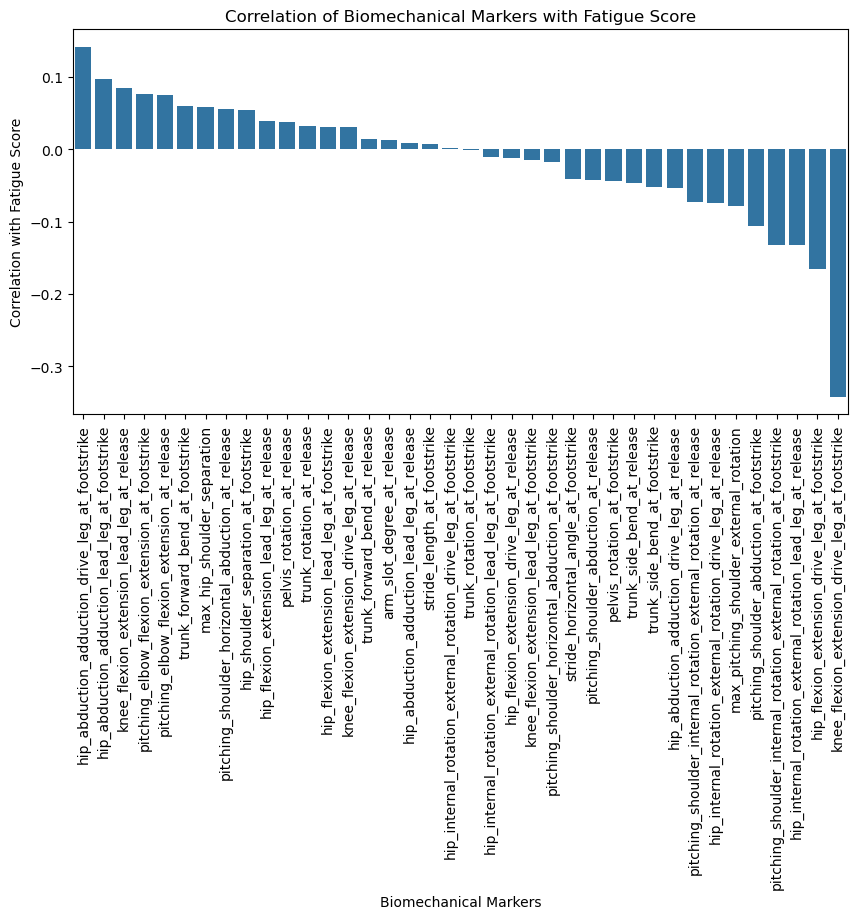


Feature Importance:
                                               Feature  Coefficient   F-Value  \
11     knee_flexion_extension_drive_leg_at_footstrike     1.441887  5.831196   
5       hip_flexion_extension_drive_leg_at_footstrike    -2.375617  1.239256   
6     hip_abduction_adduction_drive_leg_at_footstrike     0.900840  0.895226   
28  hip_internal_rotation_external_rotation_lead_l...     0.914976  0.784627   
3   pitching_shoulder_internal_rotation_external_r...    -3.772476  0.778423   
1           pitching_shoulder_abduction_at_footstrike    -3.705262  0.504462   
9      hip_abduction_adduction_lead_leg_at_footstrike    -4.994898  0.416412   
30         knee_flexion_extension_lead_leg_at_release    -0.150216  0.315387   
36            max_pitching_shoulder_external_rotation     0.194484  0.269288   
4      pitching_elbow_flexion_extension_at_footstrike    -2.274525  0.254217   
22        pitching_elbow_flexion_extension_at_release    -0.869011  0.246873   
25  hip_internal_r

In [22]:
# Plot correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.xlabel("Biomechanical Markers")
plt.ylabel("Correlation with Fatigue Score")
plt.title("Correlation of Biomechanical Markers with Fatigue Score")
plt.show()

# Feature selection using linear regression
reg = LinearRegression()
reg.fit(features, target)

# Compute F-statistics and p-values
f_values, p_values = f_regression(features, target)

# Create a DataFrame to summarize results
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': reg.coef_,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='P-Value')

print("\nFeature Importance:\n", feature_importance)

# Identify significant markers (p < 0.05)
significant_markers = feature_importance[feature_importance['P-Value'] < 0.05]
print("\nSignificant Biomechanical Markers:", significant_markers['Feature'].tolist())


## Section 3: Using a Random Forest

### Summary:
Instead of using *corr()* or *corrwith()*, we tried using another regression/machine learning model to see if we get a different output. After running the model, *knee_flexion_extension_drive_leg_at_footstrike* seems to be the best preditctor, but it is weak at best.

In [23]:
# drop the fatigue_score column to use the biomechanical markers as features
X = average_df.drop('fatigue_score', axis=1)
# set the target variable as the fatigue_score
y = average_df['fatigue_score']

# create a random forest regressor model
model = RandomForestRegressor()
# fit the model to the data
model.fit(X, y)

# get the feature importances from the model
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# print the feature importances
print(feature_importance)

knee_flexion_extension_drive_leg_at_footstrike                         0.102886
trunk_forward_bend_at_release                                          0.081907
stride_horizontal_angle_at_footstrike                                  0.049768
hip_flexion_extension_drive_leg_at_footstrike                          0.048971
stride_length_at_footstrike                                            0.040675
pitching_shoulder_abduction_at_footstrike                              0.039777
hip_internal_rotation_external_rotation_lead_leg_at_release            0.037864
hip_abduction_adduction_drive_leg_at_footstrike                        0.032153
hip_internal_rotation_external_rotation_drive_leg_at_release           0.031970
trunk_side_bend_at_release                                             0.031468
knee_flexion_extension_lead_leg_at_footstrike                          0.028869
hip_abduction_adduction_lead_leg_at_footstrike                         0.028800
max_pitching_shoulder_external_rotation 